# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [4]:
fitbit = pd.read_csv('..\\data\\Fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

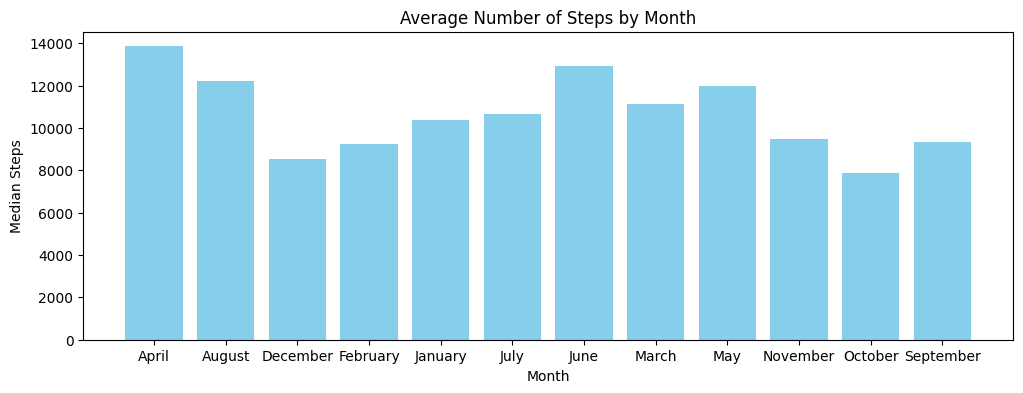

In [6]:
media = fitbit.groupby('Months')['Steps'].median()
fig, ax = plt.subplots(figsize=(12, 4))

plt.bar(media.index, media.values, color='skyblue')

plt.xlabel('Month')
plt.ylabel('Median Steps')
plt.title('Average Number of Steps by Month')

plt.savefig('..\\figures\\average_steps_by_month.png')

plt.show()

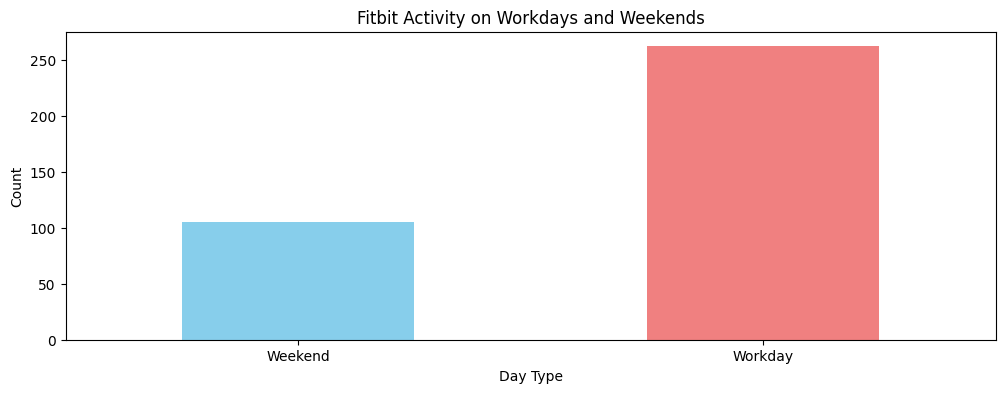

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))

fitbit['Work_or_Weekend'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.xlabel('Day Type')
plt.ylabel('Count')
plt.title('Fitbit Activity on Workdays and Weekends')

plt.xticks([0, 1], ['Weekend', 'Workday'], rotation=0)

plt.savefig('..\\figures\\activity_workdays_weekends.png')

plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

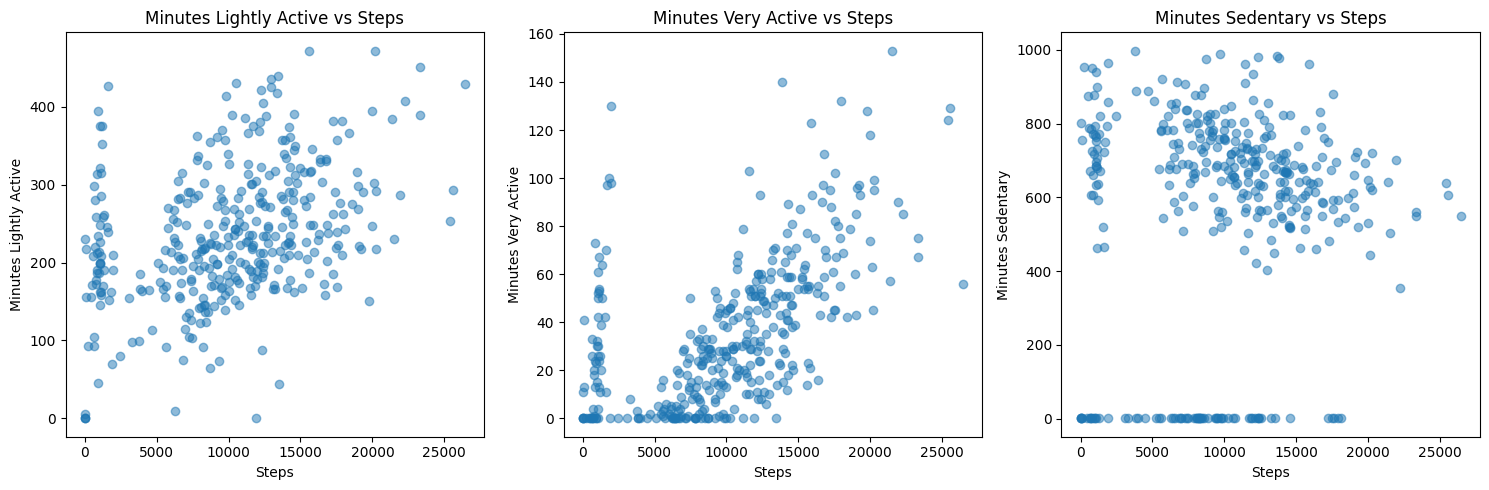

In [8]:
features = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(features):
    axes[i].scatter(fitbit['Steps'], fitbit[feature], alpha=0.5)
    axes[i].set_title(f'{feature} vs Steps')
    axes[i].set_xlabel('Steps')
    axes[i].set_ylabel(feature)

plt.tight_layout()

plt.savefig('..\\figures\\scatter_plots.png')

plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [9]:
titanic = pd.read_csv('..\\data\\titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [10]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [16]:
# NUMERICAL VARIABLES
titanic.select_dtypes(np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [5]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=['object', 'category'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [11]:
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

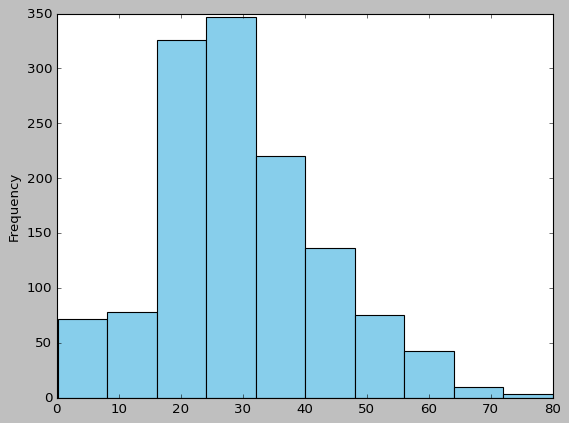

In [12]:
titanic['Age'].plot.hist(bins=10, color='skyblue', edgecolor='black')
plt.xlabel= 'Edad'
plt.ylabel= 'Personas'
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

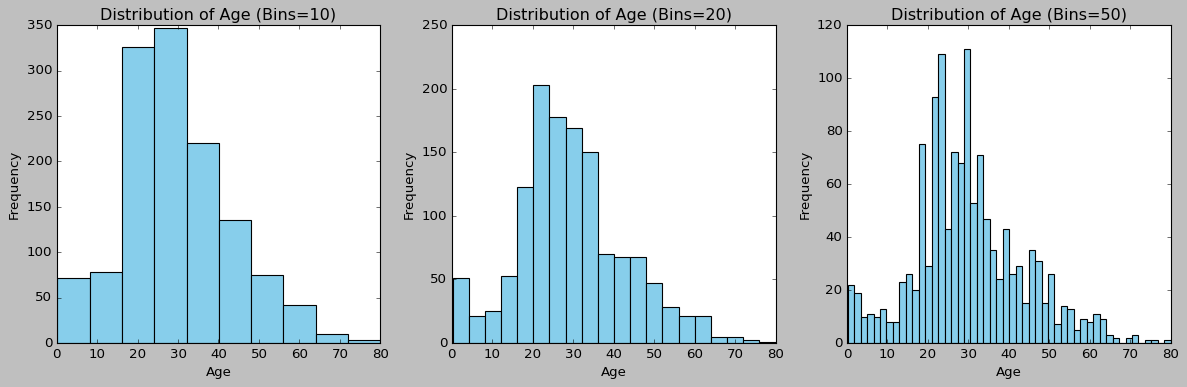

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


bin_sizes = [10, 20, 50]
for i, bins in enumerate(bin_sizes):
    axes[i].hist(titanic['Age'].dropna(), bins=bins, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of Age (Bins={bins})')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.savefig('..\\figures\\titanic_plots.png')

plt.show()


#### How does the bin size affect your plot?

In [ ]:
"""
A mayor sea el número de Bins, con más detalle podremos ver, en este caso, la distribución por edad. Mientras que en el primero están agrupados de
10 en 10 años, cuando vamos aumentado el número, se van desagrupando y podemos ver la distribución año por año prácticamente.
De esta forma, cuando menor sea el número, será un enfoque más general, y cuanto mayor sea, será más detallado. Elegir qué tipo de distribución
queremos ver, dependerá del tipo de diagrama y datos que queramos analizar.

"""

#### Use seaborn to show the distribution of column `Age`.

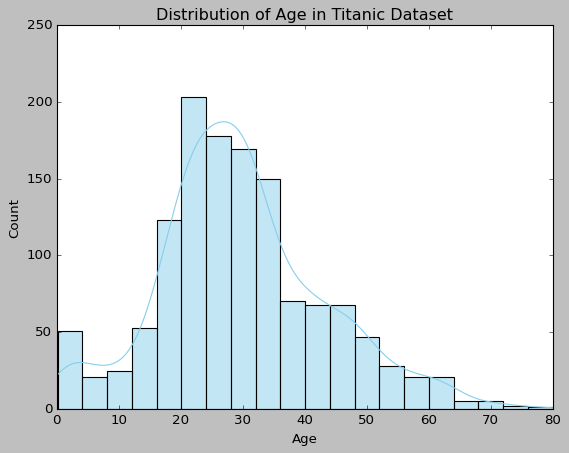

In [17]:
sns.histplot(data=titanic, x='Age', bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel = 'Age'
plt.ylabel = 'Count'
plt.title('Distribution of Age in Titanic Dataset')
plt.savefig('..\\figures\\titanic_sns.png')
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

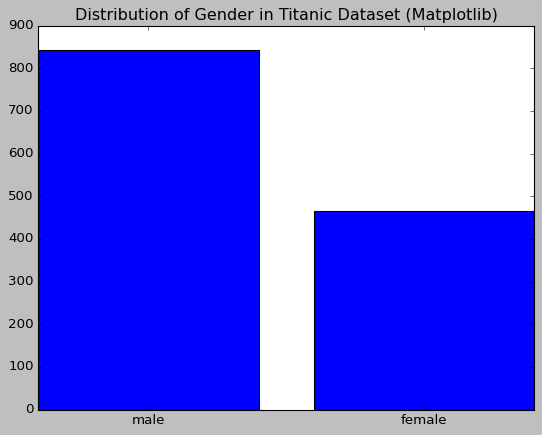

In [19]:
# Method 1 - matplotlib

gender_counts = titanic['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts)
plt.xlabel = 'Gender'
plt.ylabel = 'Count'
plt.title('Distribution of Gender in Titanic Dataset (Matplotlib)')
plt.savefig('..\\figures\\gender_titanic_plot.png')
plt.show()


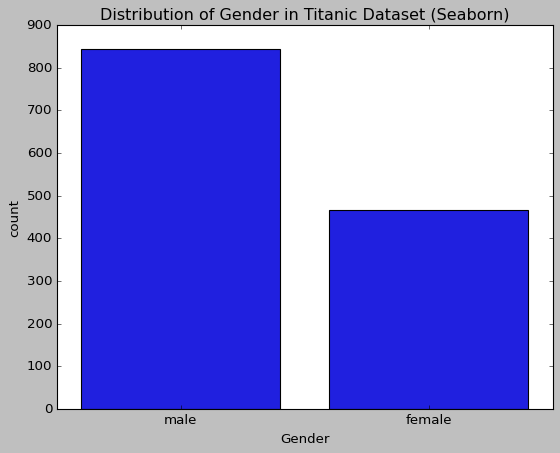

In [21]:
# Method 2 - seaborn
sns.countplot(x='Gender', data=titanic)
plt.xlabel = 'Gender'
plt.ylabel = 'Count'
plt.title('Distribution of Gender in Titanic Dataset (Seaborn)')
plt.savefig('..\\figures\\gender_titanic_sns.png')
plt.show()

#### Use the right plot to visualize the column `Pclass`.

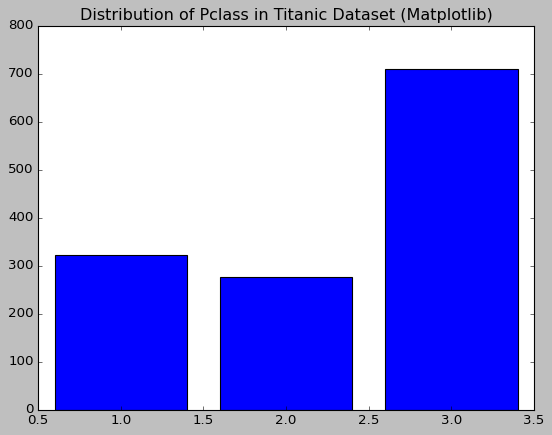

In [22]:
pclass_counts = titanic['Pclass'].value_counts()
plt.bar(pclass_counts.index, pclass_counts)
plt.xlabel = 'Pclass'
plt.ylabel = 'Count'
plt.title('Distribution of Pclass in Titanic Dataset (Matplotlib)')
plt.savefig('..\\figures\\pclass.png')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

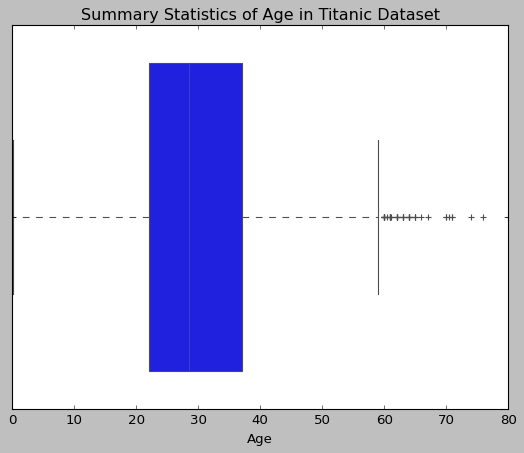

In [24]:
sns.boxplot(x='Age', data=titanic)
plt.xlabel = 'Age'
plt.title('Summary Statistics of Age in Titanic Dataset')
plt.savefig('..\\figures\\age_summary.png')
plt.show()

In [ ]:
"""
Un box plot puede ser util para ver tanto la tendencia central como el rango intercuartil para ver la distribución general de edades
en el Titanic, así como la mediana de los datos. También podemos ver con claridad los outliers, al no tener una gran cantidad de datos.

"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Vemos que la distribución principal de edades oscilaba entre los 21-22 y los 36-37 años, siendo la mediana de unos 28 años. También apreciamos
que casi la totalidad de outliers se encuentra por arriba, siendo gente mayor por encima de los 60 años.

"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

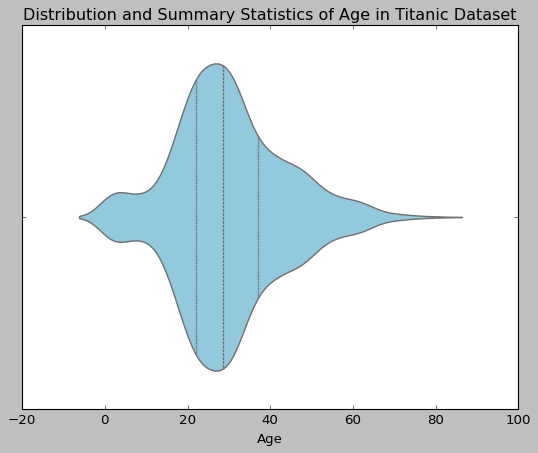

In [25]:
sns.violinplot(x='Age', data=titanic, inner='quartile', color='skyblue')
plt.xlabel = 'Age'
plt.title('Distribution and Summary Statistics of Age in Titanic Dataset')
plt.savefig('..\\figures\\titanic_violin.png')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Podemos ver con mayor claridad la densidad de personas para cada rango de edad, con la mayor densidad concentrándose en el centro de la tabla
y disminuyendo a medidad que avanza la edad.

"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

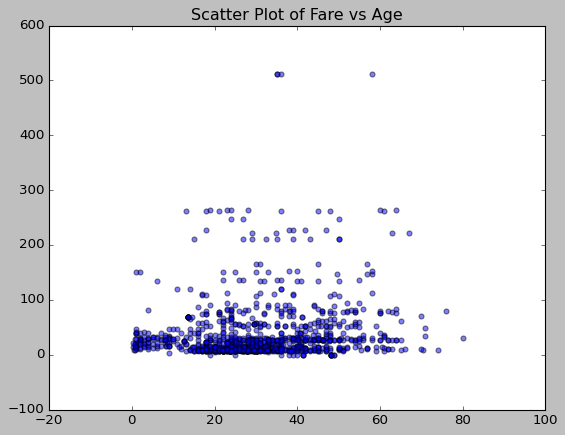

In [26]:
# Method 1 - matplotlib
plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5)
plt.xlabel = 'Age'
plt.ylabel = 'Fare'
plt.title('Scatter Plot of Fare vs Age')
plt.savefig('..\\figures\\fare_age_plot.png')
plt.show()

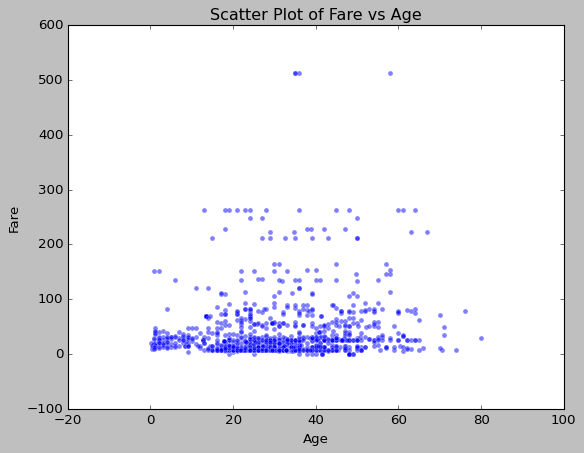

In [27]:
# Method 2 - seaborn
sns.scatterplot(x='Age', y='Fare', data=titanic, alpha=0.5)
plt.xlabel = 'Age'
plt.ylabel = 'Fare'
plt.title('Scatter Plot of Fare vs Age')
plt.savefig('..\\figures\\fare_age_sns.png')
plt.show()

#### Plot the correlation matrix using seaborn.

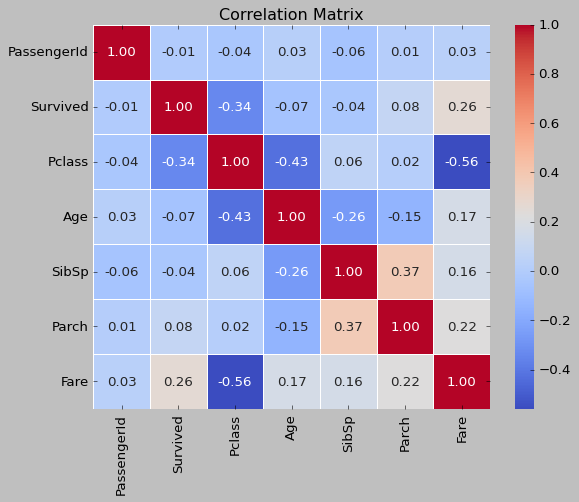

In [29]:
numeric_columns = titanic.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = titanic[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('..\\figures\\titanic_matrix.png')
plt.show()

#### What are the most correlated features?

In [ ]:
"""
PClass y Fare son las dos columnas con más correlación, ya que a mayor cantidad de dinero pagado, mejor era la clase en la que situaban

La edad también se correlaciona con la clase ya que la gente mayor por lo general era más adinerada que la gente jóven

"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

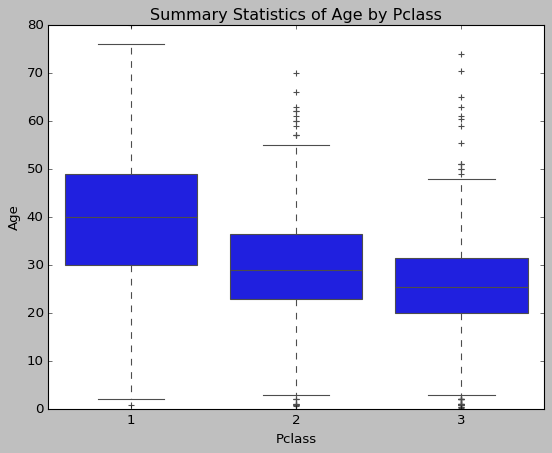

In [30]:
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Summary Statistics of Age by Pclass')
plt.savefig('..\\figures\\age_pclass.png')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

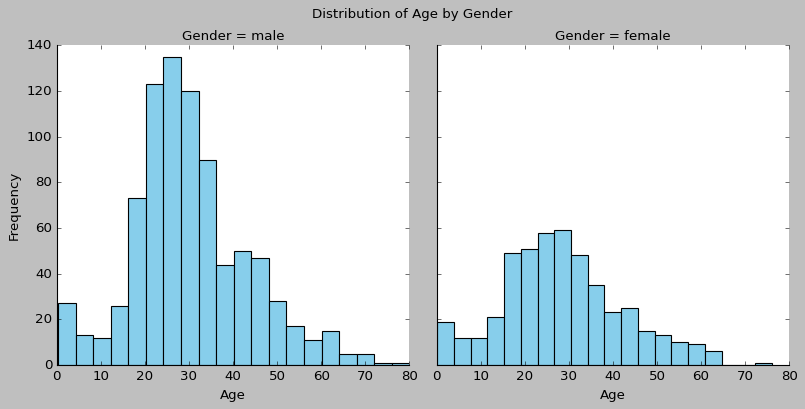

In [31]:
g = sns.FacetGrid(titanic, col="Gender", height=5, aspect=1)
g.map(plt.hist, 'Age', bins=20, color='skyblue', edgecolor='black')
g.set_axis_labels('Age', 'Frequency')
plt.suptitle('Distribution of Age by Gender', y=1.02)
plt.savefig('..\\figures\\age_gender.png')
plt.show()